# Réalisation du spectrogramme d'un audio

## 1 - Création d'un spectrogramme de base avec les paramètre par défauts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.io import wavfile

Dans un premier temps on va lire le fichier audio

In [ ]:
sample_rate, audio_data = wavfile.read('/content/drive/MyDrive/Colab Notebooks/sample.wav')

print("Sample rate:", sample_rate)

Sample rate: 8000


<ipython-input-5-b432e8d34c9a>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('/content/drive/MyDrive/Colab Notebooks/sample.wav')


On remarque que la fréquence d'échantillonnage est de 8 kHz, ce qui implique que, pour respecter le théorème de Shannon et éviter l'aliasing, on ne doit pas analyser ou inclure des fréquences supérieures à 4 kHz.

Ensuite on calcul le spectrogramme avec les valeurs par défaut pour obtenir un apercu des données que l'on obtient. On peut alors l'afficher avec pyplot.

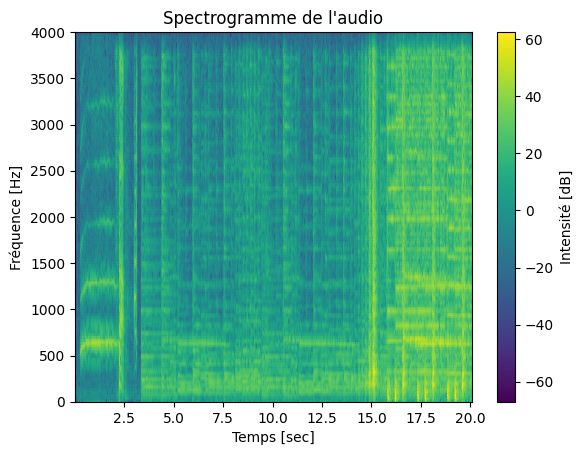

In [ ]:
# Calcul du spectrogramme
frequencies, times, spectrogram_data = spectrogram(audio_data, fs=sample_rate)

# Affichage du spectrogramme
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')
plt.title('Spectrogramme de l\'audio')
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [sec]')
plt.colorbar(label='Intensité [dB]')
plt.show()

## 2 - Choix des variables

Nous allons pouvoir jouer principalement avec quatre paramètres du spectrogramme de SciPy :

- **window** : la fenêtre d'apodisation, choisie en fonction de la taille des pics secondaires et de la largeur du pic principal.
- **nperseg** : la taille d'un segment du spectrogramme.
- **noverlap** : le nombre de points d'intersection entre chaque segment.
- **nfft** : le nombre de point utilisé pour la FFT, si nfft > nperseg alors on applique du zero-padding pour compenser la différence. Cela permet notamment d'augmenter la résolution fréquentielle

On remarque que les plus grandes fréquences mesurées sont 4kHz ce qui respecte Shannon.

A première vu les pics significatifs oscillent entre 40 et 60 dB. On a fait le choix d'une fenêtre de Hamming pour avoir une différence de 43 dB entre le pic principale et secondaire.


On la teste alors avec les paramètres restant par défauts

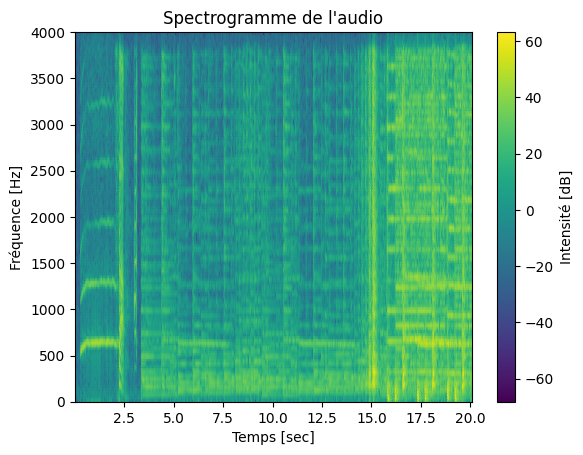

In [ ]:
# Calcul du spectrogramme
frequencies, times, spectrogram_data = spectrogram(audio_data, fs=sample_rate,window='hamming')

# Affichage du spectrogramme
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')
plt.title('Spectrogramme de l\'audio')
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [sec]')
plt.colorbar(label='Intensité [dB]')
plt.show()

### Ajout des autres paramètres

Nous pourrons ensuite choisir les derniers paramètres, notamment la fenêtre à utiliser et le zero-padding, en réalisant des expérimentations pour observer leurs effets sur le spectrogramme.

- Après plusieurs tests il semble que l'utilisation d'une fenêtre de 1024 soit équilibré entre la bonne identification des pics sans perdre la précision temporelle.

- Il semble que le choix de noverlap = nperseg / 2 offre un bon compromis entre continuité temporelle et indépendance des segments.

- En choisissant nfft = 2 × nperseg = 2048, nous ajoutons un zero-padding, rendant les pics plus nets et plus faciles à interpréter, sans compromettre les performances ni introduire de distorsions significatives.



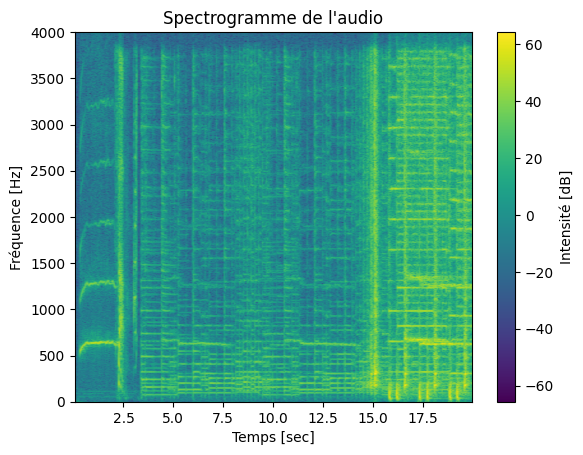

In [ ]:
nperseg = 1024  # Taille du segment
noverlap = nperseg/2  # Chevauchement (50%)
nfft = nperseg*2      # Taille de la FFT
window = 'hamming'

# Calcul du spectrogramme
frequencies, times, spectrogram_data = spectrogram(audio_data, fs=sample_rate,window='hamming',nperseg=nperseg,noverlap=noverlap,nfft=nfft)

# Affichage du spectrogramme
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')
plt.title('Spectrogramme de l\'audio')
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [sec]')
plt.colorbar(label='Intensité [dB]')
plt.show()